# Fast Fourier Transform operation with pyclesperanto

This notebook display the usage of `fft` and `ifft` in pyclesperanto. As it is still a WIP, functions, parameters and usage may still change.

In [1]:
import pyclesperanto as cle
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

cle.select_device(1,"gpu")

(OpenCL) Apple M2 Max (OpenCL 1.2 )
	Vendor:                      Apple
	Driver Version:              1.2 1.0
	Device Type:                 GPU
	Compute Units:               30
	Global Memory Size:          21845 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4096 MB
	Max Clock Frequency:         1000 MHz
	Image Support:               Yes

## Applying FFT and iFFT to an array

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]],
      dtype=float32, mtype=buffer)
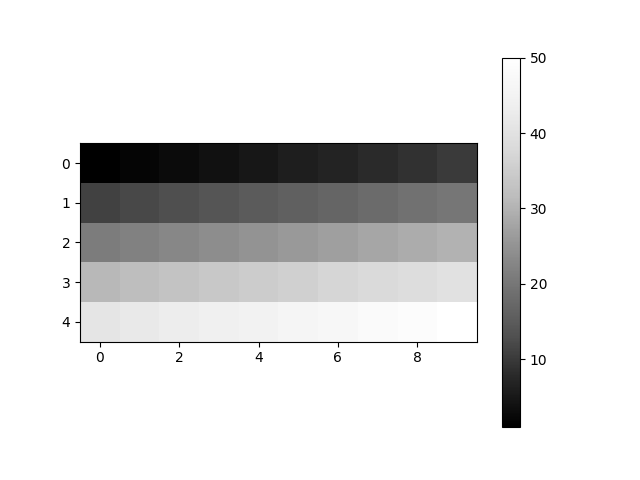
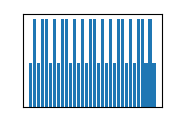

In [2]:
arr = cle.push(np.asarray( 
    [
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ],
        [
            [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10],
            [11,12,13,14,15,16,17,18,19,20],
            [21,22,23,24,25,26,27,28,29,30],
            [31,32,33,34,35,36,37,38,39,40],
            [41,42,43,44,45,46,47,48,49,50]
        ]
    ]
).astype(np.float32))
arr

we call the `fft` operation which take a real array as input and will return the fft output as an Hermitian Complex buffer.

In [3]:
cle.fft?

Signature:
cle.fft(
    input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array],
    output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array, NoneType] = None,
    device: Optional[pyclesperanto._pyclesperanto._Device] = None,
) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
Docstring:
Perform a 1D, 2D or 3D FFT (Fast Fourier Transform) on the input image

Parameters
----------
input_image: Image
    Input image
output_image: Optional[Image] (= None)
    Output image
device: Optional[Device] (= None)
    Device to perform the operation on.

Returns
-------
Image
File:      ~/Documents/github/pyclesperanto/pyclesperanto/_tier8.py
Type:      function

array([[[ 2.5500000e+03,  0.0000000e+00, -5.0000000e+01,  1.5388417e+02,
         -5.0000000e+01,  6.8819107e+01, -5.0000000e+01,  3.6327129e+01,
         -5.0000000e+01,  1.6245987e+01, -5.0000000e+01,  0.0000000e+00],
        [-5.0000000e+02,  6.8819098e+02, -4.3209559e-07,  2.6002335e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -3.4644248e-07,  1.3039468e-07,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02,  1.6245987e+02, -4.9165410e-06,  4.8424563e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -1.4675538e-06, -9.9071667e-07,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02, -1.6245987e+02,  6.8238896e-06, -1.0277590e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          1.4675538e-06,  1.9443910e-06,  0.0000000e+00,  0.0000000e+00],
        [-5.0000000e+02, -6.8819098e+02,  2.3394441e-06,  1.2144637e-06,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          3.4644248e-07,  8.2327961e-07,  0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]],
      dtype=float32, mtype=buffer)
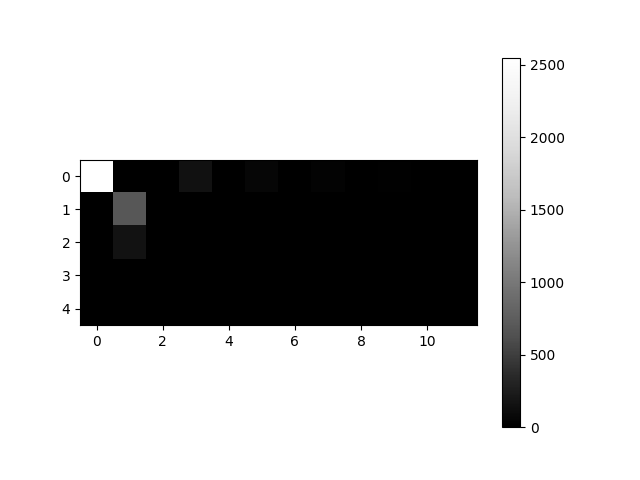
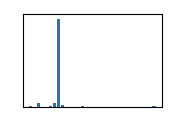

In [4]:
fft_arr = cle.fft(arr, None)
fft_arr

We can transform back the complexe buffer into a real array using the `ifft` function. Here, because we do not have the precise dimension of the real buffer output, an empty output buffer must be provided to the function. In this example, it is the same size buffer provided to the `fft` at the start of this notebook.

array([[[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]],

       [[ 1.       ,  1.9999996,  3.0000002,  4.       ,  5.       ,
          6.       ,  7.       ,  8.       ,  9.       , 10.       ],
        [10.999999 , 11.999999 , 12.999999 , 13.999999 , 14.999999 ,
         15.999999 , 16.999998 , 17.999998 , 18.999998 , 19.999998 ],
        [21.       , 22.       , 23.       , 24.       , 25.       ,
         26.       , 27.       , 28.       , 29.       , 30.       ],
        [31.       , 32.       , 33.       , 34.       , 35.       ,
         36.       , 37.       , 38.       , 39.       , 40.       ],
        [41.       , 42.       , 43.       , 44.       , 45.       ,
         46.       , 47.       , 48.       , 49.       , 50.       ]]],
      dtype=float32, mtype=buffer)
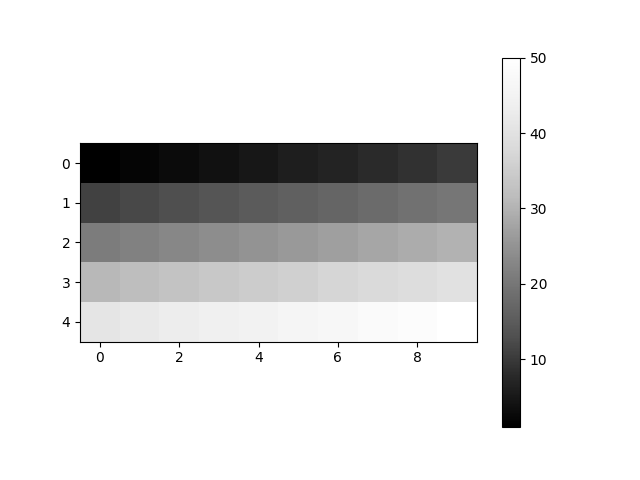
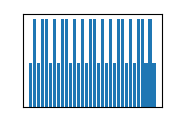

In [5]:
new_arr = cle.create_like(arr)
cle.ifft(fft_arr, new_arr)
new_arr

We manage to retrieve the original array, with some approximation errors, possibly due to `single precision` approximation. 

Applying the same operation using numpy for verification with single and double precision. We can see with sinple precision that we also have some approximation (although less) which disapear using double precision.

In [6]:
np.fft.ifft2(np.fft.fft2(arr)).real  # single precision

array([[[ 1.      ,  2.      ,  3.      ,  4.      ,  5.      ,
          6.      ,  7.      ,  8.      ,  9.      , 10.      ],
        [10.999999, 11.999999, 12.999999, 13.999999, 14.999999,
         15.999999, 16.999998, 17.999998, 18.999998, 19.999998],
        [21.      , 22.      , 23.      , 24.      , 25.      ,
         26.      , 27.      , 28.      , 29.      , 30.      ],
        [31.      , 32.      , 33.      , 34.      , 35.      ,
         36.      , 37.      , 38.      , 39.      , 40.      ],
        [41.      , 42.      , 43.      , 44.      , 45.      ,
         46.      , 47.      , 48.      , 49.      , 50.      ]],

       [[ 1.      ,  2.      ,  3.      ,  4.      ,  5.      ,
          6.      ,  7.      ,  8.      ,  9.      , 10.      ],
        [10.999999, 11.999999, 12.999999, 13.999999, 14.999999,
         15.999999, 16.999998, 17.999998, 18.999998, 19.999998],
        [21.      , 22.      , 23.      , 24.      , 25.      ,
         26.      , 27.      , 

In [7]:
np.fft.ifft2(np.fft.fft2(arr.get().astype(float))).real  # double precision

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]],

       [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]]])

## FFT on an image

array([[ 40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,  32.,  24.,
         24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152., 184., 208.,
        232., 232., 224.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160., 192., 216.,
        232., 232., 232.],
       [ 64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  24.,
         24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168., 200., 216.,
        224., 232., 232.],
       [ 40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,  24.,  24.,
         24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184., 208., 216.,
        224., 224., 224.],
       [ 16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  24.,  40.,  48.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216.],
       [ 24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,  24.,  16.,
         24.,  32.,  56.,  80., 112., 144., 176., 200., 208., 216., 216.,
        216., 216., 208.],
       [ 32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,  16.,  16.,
         32.,  40.,  80., 112., 144., 176., 200., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,  24.,  24.,
         48.,  64., 104., 144., 168., 192., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,  24.,  32.,
         64.,  88., 136., 176., 192., 200., 208., 216., 216., 208., 208.,
        200., 200., 192.],
       [ 48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,  40.,  48.,
         80., 112., 152., 184., 192., 200., 208., 216., 216., 216., 208.,
        208., 200., 200.],
       [ 48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  48.,  64.,
        104., 136., 160., 184., 192., 200., 208., 216., 216., 216., 216.,
        208., 208., 200.],
       [ 40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,  64.,  88.,
        112., 144., 160., 176., 192., 200., 208., 216., 224., 224., 216.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  80., 104.,
        128., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  96., 120.,
        136., 144., 160., 168., 184., 192., 208., 216., 224., 224., 224.,
        216., 208., 200.],
       [ 32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72., 104., 128.,
        136., 144., 152., 160., 176., 192., 208., 216., 216., 216., 216.,
        216., 208., 200.],
       [ 48.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,  96., 120.,
        136., 152., 168., 176., 192., 208., 216., 224., 224., 216., 216.,
        208., 200., 192.],
       [ 56.,  40.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,  88., 112.,
        136., 152., 176., 192., 208., 216., 224., 224., 224., 216., 208.,
        200., 192., 184.],
       [ 80.,  56.,  40.,  32.,  24.,  32.,  32.,  48.,  64.,  88., 112.,
        144., 168., 184., 208., 216., 224., 232., 232., 224., 216., 208.,
        200., 192., 176.],
       [ 96.,  72.,  48.,  40.,  24.,  24.,  24.,  40.,  56.,  88., 112.,
        144., 176., 200., 216., 224., 232., 232., 232., 224., 216., 208.,
        192., 184., 168.],
       [120.,  96.,  64.,  48.,  32.,  32.,  24.,  48.,  64.,  96., 120.,
        152., 184., 208., 224., 232., 232., 232., 232., 224., 216., 208.,
        192., 176., 160.],
       [136., 112.,  80.,  56.,  32.,  32.,  24.,  48.,  64.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 152.],
       [152., 128.,  96.,  72.,  48.,  40.,  24.,  40.,  56.,  96., 128.,
        160., 192., 208., 224., 232., 232., 232., 232., 224., 216., 200.,
        184., 168., 144.],
       [160., 136., 112.,  88.,  56.,  40.,  24.,  40.,  48.,  88., 120.,
        160., 192., 208., 216., 224., 232., 232., 232., 224., 216., 200.,
  
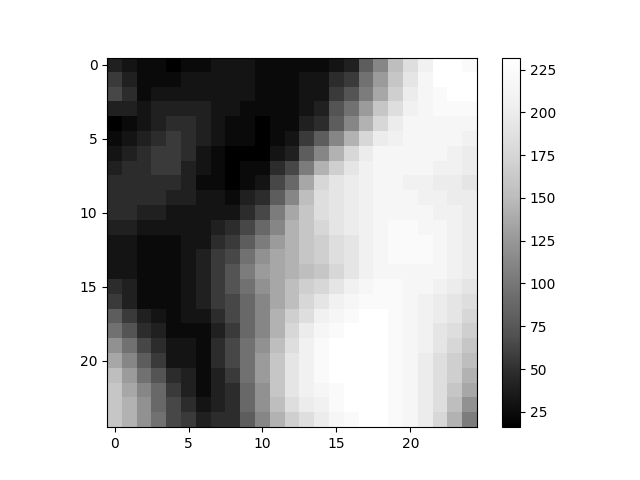
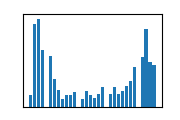

In [8]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:25])
image

array([[ 7.60480000e+04,  0.00000000e+00, -1.29348828e+03,
         2.93375352e+04, -8.78221313e+02,  5.14521289e+03,
        -1.93794043e+03,  3.02302759e+03, -1.23869043e+03,
         2.56508105e+03, -1.31883289e+03,  1.88128394e+03,
        -1.32391504e+03,  1.25985217e+03, -1.25388452e+03,
         1.03587988e+03, -1.31072974e+03,  7.99563293e+02,
        -1.39977515e+03,  4.81324097e+02, -1.26516711e+03,
         4.26673889e+02, -1.19580298e+03,  1.72606689e+02,
        -1.60755200e+03, -2.60289673e+02],
       [-3.05712988e+03,  6.94592920e+03,  3.77175952e+03,
        -6.64639844e+03,  1.03140747e+03,  2.69614111e+03,
         1.69738867e+03, -1.07301758e+02,  1.10272974e+03,
         8.70531998e+01,  1.04500867e+03,  1.59591675e+02,
         8.71522583e+02,  2.70213928e+02,  6.61044556e+02,
         2.26386429e+02,  5.83132080e+02,  4.37123779e+02,
         5.01329041e+02,  3.12425171e+02,  4.55927185e+02,
         5.31809692e+02,  5.11664276e+02,  5.35058594e+02,
         2.60004517e+02,  4.17825287e+02],
       [-1.56302991e+03,  4.55707129e+03,  1.35451263e+02,
        -3.41037793e+03,  2.69961963e+03,  3.71999951e+03,
         7.17761902e+02, -1.40167542e+01,  8.69444824e+02,
         5.29452515e+02,  4.77380127e+02,  2.19403931e+02,
         3.09488647e+02,  3.51132172e+02,  2.26143707e+02,
         4.16414062e+02,  2.19709320e+02,  3.79616760e+02,
         8.79398956e+01,  3.77512909e+02,  3.15426636e+01,
         4.27432251e+02, -4.50566177e+01,  5.05402344e+02,
        -5.54541016e+01,  2.93685791e+02],
       [-1.14972510e+03,  2.04195776e+03,  1.85234985e+02,
        -8.61049622e+02,  1.37481421e+03, -2.58160645e+02,
         5.97814575e+02,  6.78405151e+02,  1.78653244e+02,
        -2.55641800e+02,  2.16624237e+02,  1.70866394e+02,
         1.85815948e+02,  1.13690262e+01,  1.48117615e+02,
         1.67285187e+02,  1.13643387e+02,  1.70141846e+02,
         9.18583755e+01,  9.32529297e+01, -2.58205681e+01,
         9.85843201e+01,  9.34228516e+00,  1.68324707e+02,
         2.31110878e+01,  1.23628738e+02],
       [-9.77455078e+02,  1.34035986e+03,  1.13328247e+02,
        -7.84057434e+02,  5.38099731e+02,  4.55152710e+02,
         3.84958221e+02,  1.01717316e+02, -6.65839233e+01,
         1.31869400e+02,  1.44588028e+02,  9.31907043e+01,
        -4.56557465e+00,  5.14784393e+01,  9.00593719e+01,
         8.67025452e+01, -4.04691925e+01,  1.27811447e+02,
        -1.29219437e+01,  1.34333206e+02, -4.28318939e+01,
         1.31047470e+02, -6.12456970e+01,  1.23285118e+02,
        -7.17074738e+01,  5.93334427e+01],
       [-1.02144275e+03,  9.78684265e+02,  4.62332275e+02,
        -8.37723633e+02,  2.11490570e+02,  6.12128845e+02,
         2.86722351e+02,  2.37071167e+02,  1.77433517e+02,
         1.44447006e+02,  2.16655884e+01,  1.68758041e+02,
         1.94866486e+01,  7.28308563e+01, -5.18628769e+01,
         7.55868378e+01, -4.47854919e+01,  1.49851349e+02,
        -4.03393059e+01,  7.92736511e+01, -3.83343887e+01,
         1.08576492e+02, -7.62703857e+01,  1.09392456e+02,
        -8.52116852e+01,  7.27075195e+01],
       [-1.08890210e+03,  8.32305420e+02,  2.44463287e+02,
        -6.69355835e+02,  2.29903625e+02,  4.93947327e+02,
         7.43117828e+01,  3.24551605e+02,  1.51364777e+02,
         1.64044098e+02,  9.71209030e+01,  2.92954712e+02,
        -1.20639793e+02,  1.24193405e+02,  4.42658463e+01,
         1.56368759e+02, -4.96339951e+01,  1.23488930e+02,
        -2.17467842e+01,  9.45730362e+01, -1.15945511e+01,
         1.57522003e+02, -2.63085957e+01,  4.40422058e+01,
        -7.00941162e+01,  3.85006371e+01],
       [-1.00560822e+03,  7.50423950e+02,  4.43907013e+02,
        -3.83558807e+02,  2.21534485e+02,  5.67309814e+02,
         1.04533783e+02,  2.46907486e+02, -4.44740868e+01,
         1.72439941e+02,  2.65390930e+01,  1.86456009e+02,
        -1.71186676e+01,  1.01707779e+02, -7.46441345e+01,
         1.18770081e+02, -4.56127548e+01,  8.78773041e+01,
         1.86077042e+01,  1.08849762e+02,
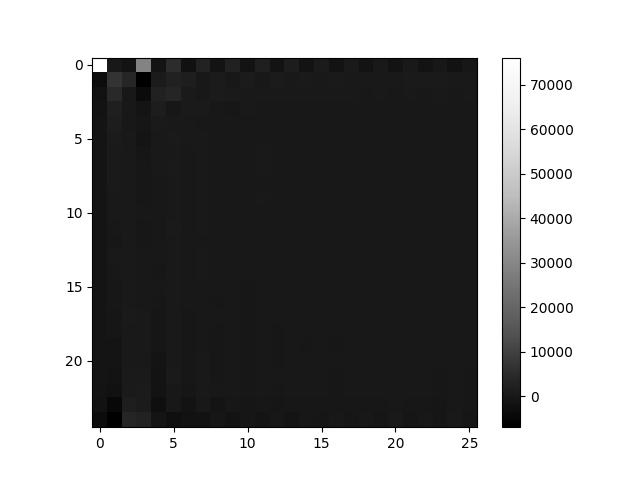
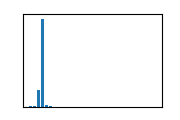

In [9]:
fft_image = cle.fft(image, None)
fft_image

array([[ 40.000008,  32.00002 ,  24.000008,  24.000023,  16.      ,
         24.      ,  24.000015,  32.000015,  32.      ,  32.000008,
         24.000011,  24.      ,  24.000008,  24.000023,  24.000008,
         32.00001 ,  40.000008,  80.00001 , 112.00001 , 152.      ,
        184.      , 207.99998 , 231.99995 , 232.      , 223.99997 ],
       [ 56.      ,  40.000023,  24.000023,  24.000015,  24.000038,
         32.000023,  32.000015,  32.      ,  32.000015,  32.      ,
         23.999996,  23.999996,  24.000011,  32.00002 ,  32.000023,
         48.00001 ,  56.000004,  96.      , 128.      , 160.      ,
        191.99997 , 215.99995 , 231.99997 , 231.99992 , 231.99997 ],
       [ 63.99999 ,  48.000023,  24.000034,  32.000015,  32.000008,
         32.000015,  32.      ,  32.      ,  31.999985,  32.000008,
         23.999985,  23.999996,  23.999992,  32.00003 ,  32.000046,
         56.000015,  72.00003 , 104.00001 , 136.      , 167.99998 ,
        199.99998 , 215.99997 , 223.99997 , 231.99995 , 231.99997 ],
       [ 40.000004,  40.000008,  32.      ,  40.000015,  40.00002 ,
         40.000015,  40.000015,  32.      ,  32.00003 ,  24.00003 ,
         24.00002 ,  24.00003 ,  24.000046,  32.00003 ,  40.000053,
         72.00003 ,  96.000015, 128.00002 , 159.99998 , 183.99997 ,
        207.99998 , 215.99995 , 224.      , 223.99997 , 223.99997 ],
       [ 16.000015,  24.00003 ,  32.000023,  40.000015,  48.      ,
         48.      ,  40.000015,  32.000023,  24.      ,  24.000015,
         16.000017,  24.000008,  24.      ,  40.000023,  48.000023,
         80.00001 , 111.99999 , 143.99998 , 175.99997 , 200.      ,
        216.      , 215.99995 , 215.99997 , 215.99997 , 215.99995 ],
       [ 23.999996,  32.00001 ,  40.000004,  48.000015,  56.000008,
         48.000015,  40.00004 ,  32.000023,  24.000023,  24.000046,
         16.000015,  24.000008,  32.00003 ,  56.000023,  80.00001 ,
        111.999985, 143.99997 , 175.99997 , 199.99997 , 207.99997 ,
        215.99998 , 215.99997 , 215.99997 , 215.99997 , 207.99997 ],
       [ 32.000008,  40.00004 ,  48.000008,  56.00001 ,  56.000015,
         48.      ,  32.000023,  24.000023,  16.00003 ,  16.000053,
         16.000034,  32.      ,  40.000023,  80.00002 , 112.00001 ,
        143.99998 , 175.99994 , 199.99997 , 215.99994 , 215.99997 ,
        215.99997 , 215.99997 , 215.99997 , 207.99997 , 199.99997 ],
       [ 40.000008,  48.000008,  48.000004,  56.00004 ,  56.000004,
         40.000015,  31.999992,  24.00003 ,  16.000046,  24.000015,
         24.000038,  48.000015,  64.00007 , 104.000015, 144.00002 ,
        168.      , 191.99998 , 208.      , 215.99998 , 215.99998 ,
        215.99998 , 216.      , 208.      , 207.99998 , 199.99998 ],
       [ 47.99999 ,  48.00003 ,  48.000004,  48.      ,  47.99998 ,
         39.999985,  24.000008,  24.      ,  16.      ,  23.999992,
         31.999992,  63.99996 ,  87.999985, 135.99998 , 175.99998 ,
        191.99997 , 199.99994 , 207.99998 , 215.99998 , 215.99998 ,
        207.99998 , 207.99997 , 199.99998 , 199.99997 , 191.99997 ],
       [ 47.999992,  48.000015,  48.      ,  48.000015,  40.000023,
         39.999992,  32.000015,  32.000015,  24.000023,  40.000015,
         48.000008,  80.000015, 112.00003 , 152.      , 183.99997 ,
        191.99997 , 199.99998 , 207.99997 , 216.      , 216.      ,
        216.      , 207.99998 , 207.99998 , 200.      , 199.99998 ],
       [ 47.999992,  48.000027,  40.000008,  40.000015,  31.999987,
         31.999985,  32.000023,  32.000023,  32.000015,  48.000023,
         63.999992, 103.999985, 135.99998 , 160.      , 184.00002 ,
        192.      , 199.99998 , 207.99998 , 215.99997 , 216.00002 ,
        216.      , 216.      , 207.99997 , 207.99998 , 199.99997 ],
       [ 39.99999 ,  40.00002 ,  31.999983,  32.000023,  32.      ,
         32.      ,  32.000008,  40.000008,  48.00003 ,  63.999977,
         87.99999 , 111.99996 , 144.      , 159.99997 , 175.99997 ,
        191.99997 , 199.99994 , 208.      , 2
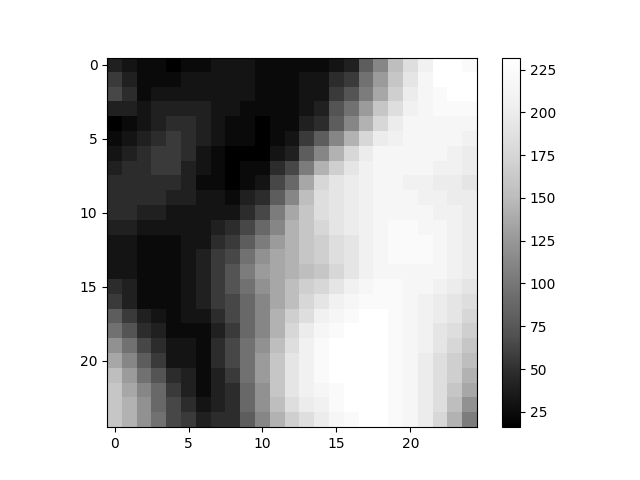
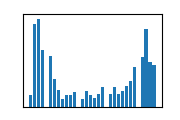

In [10]:
new_image = cle.create_like(image)
cle.ifft(fft_image, new_image)
new_image

## Smooth shape and FFT speed

FFT requires an image size at the power of 2 to compute. The library vkFFT that we are relying on can manage non-smooth shape but at a speed cost. Hence, it is advise to `pad` your input image before the `fft` to make it optimised.

(25, 37) vs [25, 40]


array([[  0.,   0.,  40.,  32.,  24.,  24.,  16.,  24.,  24.,  32.,  32.,
         32.,  24.,  24.,  24.,  24.,  24.,  32.,  40.,  80., 112., 152.,
        184., 208., 232., 232., 224., 216., 208., 208., 208., 208., 200.,
        200., 200., 184., 160., 128.,  88.,   0.],
       [  0.,   0.,  56.,  40.,  24.,  24.,  24.,  32.,  32.,  32.,  32.,
         32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,  96., 128., 160.,
        192., 216., 232., 232., 232., 224., 208., 208., 208., 200., 200.,
        192., 184., 160., 144., 112.,  80.,   0.],
       [  0.,   0.,  64.,  48.,  24.,  32.,  32.,  32.,  32.,  32.,  32.,
         32.,  24.,  24.,  24.,  32.,  32.,  56.,  72., 104., 136., 168.,
        200., 216., 224., 232., 232., 224., 208., 208., 200., 200., 192.,
        176., 160., 144., 120.,  96.,  72.,   0.],
       [  0.,   0.,  40.,  40.,  32.,  40.,  40.,  40.,  40.,  32.,  32.,
         24.,  24.,  24.,  24.,  32.,  40.,  72.,  96., 128., 160., 184.,
        208., 216., 224., 224., 224., 216., 208., 200., 192., 184., 168.,
        152., 136., 120.,  96.,  80.,  64.,   0.],
       [  0.,   0.,  16.,  24.,  32.,  40.,  48.,  48.,  40.,  32.,  24.,
         24.,  16.,  24.,  24.,  40.,  48.,  80., 112., 144., 176., 200.,
        216., 216., 216., 216., 216., 208., 200., 192., 176., 160., 144.,
        128., 104.,  88.,  72.,  64.,  48.,   0.],
       [  0.,   0.,  24.,  32.,  40.,  48.,  56.,  48.,  40.,  32.,  24.,
         24.,  16.,  24.,  32.,  56.,  80., 112., 144., 176., 200., 208.,
        216., 216., 216., 216., 208., 200., 192., 176., 160., 144., 128.,
        112.,  88.,  80.,  64.,  56.,  40.,   0.],
       [  0.,   0.,  32.,  40.,  48.,  56.,  56.,  48.,  32.,  24.,  16.,
         16.,  16.,  32.,  40.,  80., 112., 144., 176., 200., 216., 216.,
        216., 216., 216., 208., 200., 192., 184., 168., 144., 128., 104.,
         88.,  72.,  64.,  48.,  40.,  32.,   0.],
       [  0.,   0.,  40.,  48.,  48.,  56.,  56.,  40.,  32.,  24.,  16.,
         24.,  24.,  48.,  64., 104., 144., 168., 192., 208., 216., 216.,
        216., 216., 208., 208., 200., 192., 184., 160., 144., 120.,  96.,
         80.,  56.,  48.,  40.,  40.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  48.,  48.,  48.,  40.,  24.,  24.,  16.,
         24.,  32.,  64.,  88., 136., 176., 192., 200., 208., 216., 216.,
        208., 208., 200., 200., 192., 184., 176., 160., 136., 112.,  80.,
         64.,  40.,  40.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  48.,  48.,  40.,  40.,  32.,  32.,  24.,
         40.,  48.,  80., 112., 152., 184., 192., 200., 208., 216., 216.,
        216., 208., 208., 200., 200., 192., 184., 152., 128., 104.,  72.,
         56.,  32.,  32.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  48.,  48.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,
         48.,  64., 104., 136., 160., 184., 192., 200., 208., 216., 216.,
        216., 216., 208., 208., 200., 192., 184., 152., 112.,  88.,  64.,
         48.,  24.,  24.,  24.,  24.,  24.,   0.],
       [  0.,   0.,  40.,  40.,  32.,  32.,  32.,  32.,  32.,  40.,  48.,
         64.,  88., 112., 144., 160., 176., 192., 200., 208., 216., 224.,
        224., 216., 216., 208., 200., 192., 176., 144., 112.,  88.,  64.,
         48.,  24.,  24.,  24.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  32.,  48.,  56.,
         80., 104., 128., 144., 160., 168., 184., 192., 208., 216., 224.,
        224., 224., 216., 208., 200., 184., 168., 136., 104.,  80.,  56.,
         40.,  24.,  24.,  24.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  64.,
         96., 120., 136., 144., 160., 168., 184., 192., 208., 216., 224.,
        224., 224., 216., 208., 200., 184., 168., 128.,  96.,  72.,  48.,
         40.,  24.,  32.,  32.,  32.,  32.,   0.],
       [  0.,   0.,  32.,  32.,  24.,  24.,  24.,  32.,  40.,  56.,  72.,
        104., 128., 136., 144., 152., 160., 176., 192., 208., 216., 216.,
        216., 216., 216., 208.
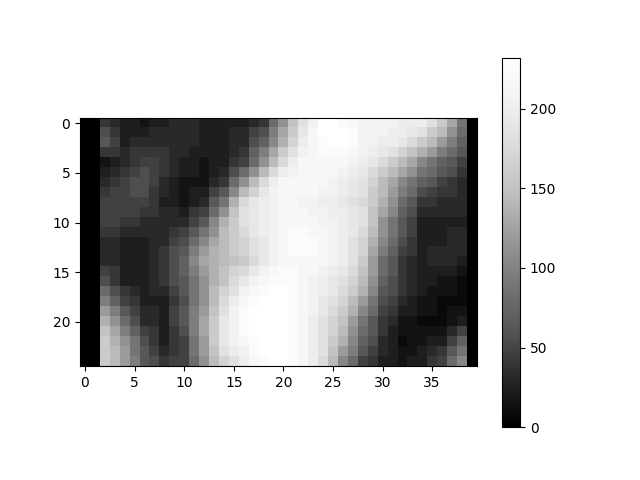
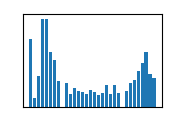

In [11]:
image = cle.push(imread("https://samples.fiji.sc/blobs.png").squeeze().astype(np.float32)[:25,:37])
smooth_shape = cle.fft_smooth_shape(image.shape)
print(image.shape , "vs", smooth_shape)
padded_image = cle.pad(image, size_x=smooth_shape[-1], size_y=smooth_shape[0], center=True)
padded_image

Once padded, we can safely apply an fft and reverse

array([[ 1.0211200e+05,  0.0000000e+00, -4.3629160e+04, ...,
        -4.6997551e+01,  6.3999988e+02,  0.0000000e+00],
       [ 4.1096970e+02,  9.2473547e+02,  1.7262709e+04, ...,
         1.8984924e+02,  3.7461133e+02,  2.1138736e+02],
       [ 8.0171692e+02,  7.2834924e+02,  8.8419258e+03, ...,
         1.3706732e+02,  6.9371162e+01,  2.5331342e+02],
       ...,
       [ 8.8394890e+01,  1.6472971e+02, -2.6965327e+03, ...,
        -7.0145950e+01, -3.6824982e+01, -3.4964657e+01],
       [ 8.0171680e+02, -7.2834930e+02, -4.3446885e+03, ...,
        -2.6196204e+02,  6.9371140e+01, -2.5331345e+02],
       [ 4.1096951e+02, -9.2473560e+02, -4.2666367e+03, ...,
        -2.5393327e+02,  3.7461130e+02, -2.1138745e+02]], dtype=float32, mtype=buffer)
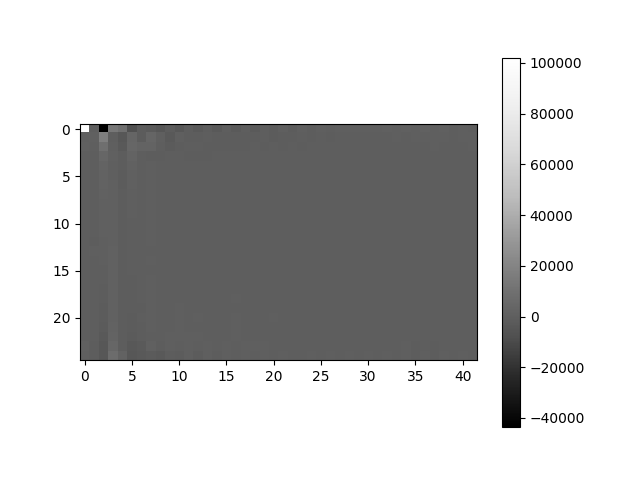
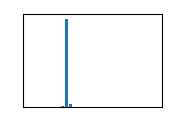

In [12]:
fft_image = cle.fft(padded_image, None)
fft_image

array([[-1.14440918e-05,  2.67028809e-05,  3.99999962e+01,
         3.20000076e+01,  2.40000019e+01,  2.40000172e+01,
         1.60000381e+01,  2.39999924e+01,  2.40000000e+01,
         3.20000153e+01,  3.20000153e+01,  3.20000229e+01,
         2.40000153e+01,  2.40000343e+01,  2.39999809e+01,
         2.40000229e+01,  2.40000076e+01,  3.20000153e+01,
         4.00000305e+01,  8.00000000e+01,  1.12000015e+02,
         1.52000000e+02,  1.83999985e+02,  2.08000015e+02,
         2.32000000e+02,  2.31999985e+02,  2.23999969e+02,
         2.16000000e+02,  2.07999985e+02,  2.08000000e+02,
         2.07999985e+02,  2.07999985e+02,  2.00000000e+02,
         1.99999985e+02,  1.99999985e+02,  1.84000000e+02,
         1.59999985e+02,  1.27999985e+02,  8.79999847e+01,
         7.62939453e-06],
       [ 3.81469727e-06, -7.62939453e-06,  5.59999733e+01,
         4.00000114e+01,  2.40000248e+01,  2.40000114e+01,
         2.39999924e+01,  3.20000229e+01,  3.20000000e+01,
         3.19999924e+01,  3.19999924e+01,  3.20000305e+01,
         2.40000305e+01,  2.40000305e+01,  2.40000000e+01,
         3.20000153e+01,  3.20000610e+01,  4.80000610e+01,
         5.60000534e+01,  9.60000229e+01,  1.28000000e+02,
         1.60000031e+02,  1.92000000e+02,  2.16000000e+02,
         2.32000000e+02,  2.32000000e+02,  2.31999969e+02,
         2.23999969e+02,  2.07999969e+02,  2.08000000e+02,
         2.08000000e+02,  1.99999969e+02,  1.99999969e+02,
         1.91999969e+02,  1.83999969e+02,  1.60000000e+02,
         1.43999969e+02,  1.11999985e+02,  8.00000000e+01,
         1.33514404e-05],
       [ 0.00000000e+00,  2.86102295e-05,  6.39999962e+01,
         4.80000038e+01,  2.40000076e+01,  3.20000153e+01,
         3.20000534e+01,  3.19999962e+01,  3.20000000e+01,
         3.20000000e+01,  3.20000000e+01,  3.20000191e+01,
         2.40000000e+01,  2.40000000e+01,  2.40000000e+01,
         3.20000153e+01,  3.20000458e+01,  5.60000305e+01,
         7.20000305e+01,  1.04000008e+02,  1.36000015e+02,
         1.68000000e+02,  2.00000000e+02,  2.16000000e+02,
         2.24000015e+02,  2.32000000e+02,  2.31999969e+02,
         2.24000000e+02,  2.07999985e+02,  2.08000000e+02,
         2.00000000e+02,  1.99999969e+02,  1.92000000e+02,
         1.75999969e+02,  1.59999969e+02,  1.43999985e+02,
         1.19999954e+02,  9.60000000e+01,  7.20000153e+01,
         1.71661377e-05],
       [ 3.81469727e-06,  1.52587891e-05,  4.00000229e+01,
         4.00000038e+01,  3.20000229e+01,  3.99999962e+01,
         4.00000000e+01,  4.00000381e+01,  3.99999924e+01,
         3.19999924e+01,  3.20000076e+01,  2.39999924e+01,
         2.40000381e+01,  2.40000305e+01,  2.39999905e+01,
         3.20000114e+01,  4.00000000e+01,  7.20000153e+01,
         9.60000458e+01,  1.27999969e+02,  1.59999985e+02,
         1.83999969e+02,  2.07999954e+02,  2.16000000e+02,
         2.23999969e+02,  2.23999985e+02,  2.23999985e+02,
         2.15999969e+02,  2.07999954e+02,  1.99999969e+02,
         1.91999985e+02,  1.84000000e+02,  1.68000000e+02,
         1.51999969e+02,  1.36000000e+02,  1.19999992e+02,
         9.60000076e+01,  8.00000153e+01,  6.40000076e+01,
         1.90734863e-05],
       [-1.33514404e-05,  1.04904175e-05,  1.59999847e+01,
         2.39999962e+01,  3.20000191e+01,  3.99999809e+01,
         4.80000038e+01,  4.79999924e+01,  3.99999924e+01,
         3.20000000e+01,  2.40000076e+01,  2.40000229e+01,
         1.60000477e+01,  2.40000286e+01,  2.40000057e+01,
         4.00000229e+01,  4.80000229e+01,  8.00000305e+01,
         1.12000053e+02,  1.44000015e+02,  1.76000031e+02,
         2.00000015e+02,  2.16000000e+02,  2.16000031e+02,
         2.16000000e+02,  2.16000000e+02,  2.16000000e+02,
         2.08000015e+02,  1.99999969e+02,  1.92000015e+02,
         1.76000000e+02,  1.60000000e+02,  1.43999969e+02,
         1.27999969e+02,  1.04000008e+02,  8.79999771e+01,
         7.19999847e+01,  6.39999695e+01,  4.79999924e+01,
        -9.53674316e-06],
       [-1.33514404e-05, -2.7656555
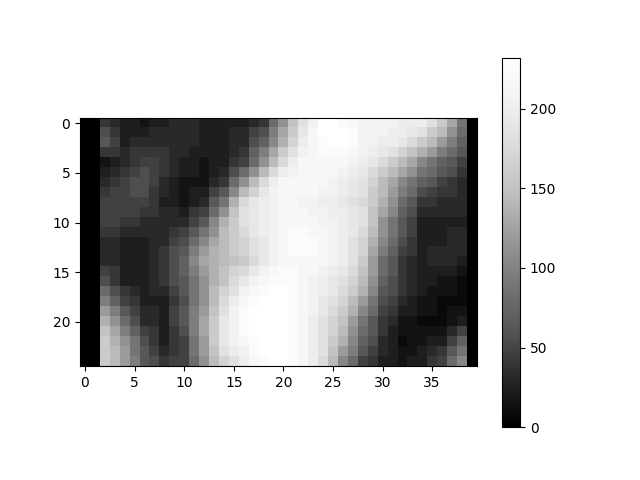
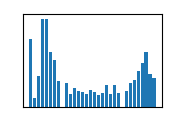

In [13]:
new_image = cle.create_like(padded_image)
cle.ifft(fft_image, new_image)
new_image

As we padded the image, the output is no more of the same size of the original data so we can unpad it

array([[ 39.999996 ,  32.000008 ,  24.000002 ,  24.000017 ,  16.000038 ,
         23.999992 ,  24.       ,  32.000015 ,  32.000015 ,  32.000023 ,
         24.000015 ,  24.000034 ,  23.99998  ,  24.000023 ,  24.000008 ,
         32.000015 ,  40.00003  ,  80.       , 112.000015 , 152.       ,
        183.99998  , 208.00002  , 232.       , 231.99998  , 223.99997  ,
        216.       , 207.99998  , 208.       , 207.99998  , 207.99998  ,
        200.       , 199.99998  , 199.99998  , 184.       , 159.99998  ,
        127.999985 ,  87.999985 ],
       [ 55.999973 ,  40.00001  ,  24.000025 ,  24.000011 ,  23.999992 ,
         32.000023 ,  32.       ,  31.999992 ,  31.999992 ,  32.00003  ,
         24.00003  ,  24.00003  ,  24.       ,  32.000015 ,  32.00006  ,
         48.00006  ,  56.000053 ,  96.00002  , 128.       , 160.00003  ,
        192.       , 216.       , 232.       , 232.       , 231.99997  ,
        223.99997  , 207.99997  , 208.       , 208.       , 199.99997  ,
        199.99997  , 191.99997  , 183.99997  , 160.       , 143.99997  ,
        111.999985 ,  80.       ],
       [ 63.999996 ,  48.000004 ,  24.000008 ,  32.000015 ,  32.000053 ,
         31.999996 ,  32.       ,  32.       ,  32.       ,  32.00002  ,
         24.       ,  24.       ,  24.       ,  32.000015 ,  32.000046 ,
         56.00003  ,  72.00003  , 104.00001  , 136.00002  , 168.       ,
        200.       , 216.       , 224.00002  , 232.       , 231.99997  ,
        224.       , 207.99998  , 208.       , 200.       , 199.99997  ,
        192.       , 175.99997  , 159.99997  , 143.99998  , 119.999954 ,
         96.       ,  72.000015 ],
       [ 40.000023 ,  40.000004 ,  32.000023 ,  39.999996 ,  40.       ,
         40.00004  ,  39.999992 ,  31.999992 ,  32.000008 ,  23.999992 ,
         24.000038 ,  24.00003  ,  23.99999  ,  32.00001  ,  40.       ,
         72.000015 ,  96.000046 , 127.99997  , 159.99998  , 183.99997  ,
        207.99995  , 216.       , 223.99997  , 223.99998  , 223.99998  ,
        215.99997  , 207.99995  , 199.99997  , 191.99998  , 184.       ,
        168.       , 151.99997  , 136.       , 119.99999  ,  96.00001  ,
         80.000015 ,  64.00001  ],
       [ 15.999985 ,  23.999996 ,  32.00002  ,  39.99998  ,  48.000004 ,
         47.999992 ,  39.999992 ,  32.       ,  24.000008 ,  24.000023 ,
         16.000048 ,  24.000029 ,  24.000006 ,  40.000023 ,  48.000023 ,
         80.00003  , 112.00005  , 144.00002  , 176.00003  , 200.00002  ,
        216.       , 216.00003  , 216.       , 216.       , 216.       ,
        208.00002  , 199.99997  , 192.00002  , 176.       , 160.       ,
        143.99997  , 127.99997  , 104.00001  ,  87.99998  ,  71.999985 ,
         63.99997  ,  47.999992 ],
       [ 24.000006 ,  32.       ,  40.000008 ,  47.999996 ,  55.999996 ,
         48.000023 ,  40.000023 ,  31.999992 ,  23.999996 ,  24.00001  ,
         16.000004 ,  24.00002  ,  31.999966 ,  55.999992 ,  80.00004  ,
        111.99999  , 144.00002  , 176.       , 199.99998  , 208.       ,
        215.99998  , 215.99998  , 216.       , 216.       , 207.99998  ,
        200.       , 191.99995  , 176.       , 160.00002  , 143.99998  ,
        128.       , 111.99998  ,  88.       ,  79.99999  ,  63.999966 ,
         55.999996 ,  39.99999  ],
       [ 31.999971 ,  39.999992 ,  47.999977 ,  55.999992 ,  56.000004 ,
         47.999977 ,  32.       ,  24.00002  ,  15.999994 ,  16.000023 ,
         16.000032 ,  32.00001  ,  40.000004 ,  80.000015 , 112.       ,
        144.00003  , 176.       , 200.       , 216.       , 215.99997  ,
        216.       , 215.99998  , 216.       , 208.       , 200.       ,
        192.       , 183.99997  , 167.99997  , 144.       , 127.999985 ,
        103.99997  ,  87.999985 ,  71.99999  ,  64.00001  ,  48.       ,
         39.999973 ,  31.999996 ],
       [ 40.000015 ,  48.000008 ,  48.00001  ,  56.00001  ,  56.       ,
         40.00003  ,  32.00001  ,  24.       ,  16.000021 ,  24.00002  ,
         24.000038 ,  48.00003  
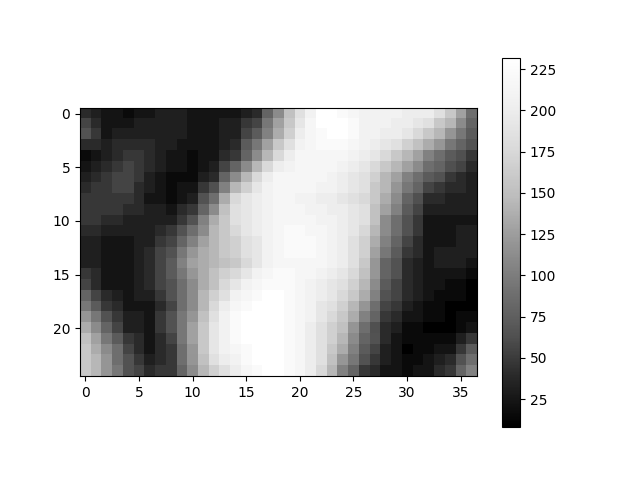
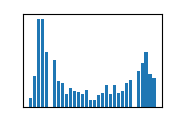

In [14]:
cle.unpad(new_image, size_x=image.shape[1], size_y=image.shape[0], center=True)